# Programming Exercise 4: Neural Networks Learning

```
by Seokkyu Kong
Date: 2016-03-25
Summary: Coursera machine learning (Prof. Andrew Ng) 강의 내용과 assignment는 octave(matlab)으로 이루어진다. 
해당 코드를 python으로 구현해본다.

Andrew Ng 교수의 강의: https://www.coursera.org/learn/machine-learning/
```

Numpy 와 MATLAB 참고 자료

- [Numpy for Matlab users #1](https://docs.scipy.org/doc/numpy-dev/user/numpy-for-matlab-users.html)
- [NumPy for MATLAB users #2](http://mathesaurus.sourceforge.net/matlab-numpy.html)

## Introduction

이번 연습문제에서는 neural network를 위한 backpropagation 알고리즘을 구현하고 필기체 숫자를 인식하는데 적용해 볼것이다. 프로그래밍 연습문제를 시작하기 전에, 강의 비디오를 보고 관련된 토픽에 대한 리뷰 문제를 완성할 것을 강력히 권장한다.

## Files included in this exercise

* sigmoidGradient.m - Compute the gradient of the sigmoid function
* randInitializeWeights.m - Randomly initialize weights
* nnCostFunction.m - Neural network cost function

연습문제에서는 스크립트 ex4.m 을 사용한다. 이들 스크립트는 문제에 대한 데이터셋을 설정하고 만들게 될 함수들에 대한 호출을 한다. 스크립트를 수정할 필요는 없다. 단지 다른 파일내에 있는 함수만 수정하면 된다. 

### Where to get help


## 1. Neural Networks

이전 연습문제에서 **neural network를 위한 feedforward propagation을 구현하고 우리가 제공한 가중치를 이용해서 필기체 숫자를 예측하는데 사용했다.** 이번 연습문제에서는 **neural network를 위한 파라미터를 _learn 학습_하기 위한 backpropagation 알고리즘을 구현하게 될것이다.**

제공된 스크립트, ex4.m, 은 당신이 이 연습문제를 진행하는데 도움을 줄 것이다.

### 1.1 Visualizing the data

ex4.m의 첫 부분에서 코드는 데이터를 로드하고 displayData 함수를 호출해서 2차원 플롯상에(Figure 1) 표시할 것이다. 

[Figure 1: Examples from the dataset]

이것은 이전 연습문제에서 사용한 데이터셋과 동일하다. ex3dat1.mat은 5000개의 training examples가 있고, 각각의 training example은 20x20 픽셀의 grayscale된 숫자 이미지이다. 각 픽셀은 해당 위치에서 grayscale의 intensity 강도를 나타내는 실수이다. **20x20 그리드 픽셀은 400 차원의 벡터로 unrolled 풀어 헤쳐진다.** 이들 training examples는 행렬 X의 하나의 row 를 구성한다. 이것은 행렬 X가 5000x400이 되는 것이고 각각의 행은 하나의 필기체 디지털 이미지가 된다.

[수식]

트레이닝 셋의 2번째 부분은 label를 포함하는 5000차원의 벡터가 된다. Octave/MATLAB의 인덱스는 0 인덱스가 없기 때문에 호환성 유지를 위해서 숫자 0을 값 10에 매핑했다. **그래서 "0" 숫자는 "10"으로 label이 되어 있고, 숫자 "1" 에서 "9" 까지는 "1" 에서 "9" 순서로 label되어 있다.**

### 1.2 Model representation

우리의 neural network가 그림 2에 보여진다. **3개의 layer를 가지고 있는데, input layer, hidden layer 그리고 output layer이다.** 입력값은 디지털 이미지의 픽셀값임을 기억하자. **이미지는 20x20 크기이기 때문에, 이것은 400개의 input layer unit을 준다. (항상 출력이 +1인 extra bias는 카운트에서 제외했다).** 트레이닝 데이터는 ex4.m 에 의해서 변수 X와 y에 로드된다. 당신은 우리가 훈련한 네트워크 파라미터 집합 $ ( \Theta^{(1)}, \Theta^{(2)}) $을 제공받는다. 이들 값은 **ex4weights.mat 에 저장되어 있고 ex4.m에 의해서 Theta1, Theta2로 로드된다. 이들 파라미터들은 두 번째 레이어의 25개 unit, 10(10개의 숫자 클래스와 일치)개의 출력 unit에 크기가 맞춰져 있다.**

```
% Load saved matrices from file
load('ex4weights.mat');
% The matrices Theta1 and Theta2 will now be in your workspace
% Theta1 has size 25 x 401
% Theta2 has size 10 x 26
```

[Figure 2: Neural network model.]


### 1.3 Feedforward and cost function

이제 **neural network 에 대한 cost 함수와 gradient를** 구현한다. 첫번째로 cost를 반환하는 nnCostFunction.m에 있는 코드를 완성한다. 

neural network에 대한 cost 함수는 다음과 같다. (regularization 없는) 

[수식]

여기서 $ h_{\theta}(x^{(i)}) $ 는 Figure 2에 보여진 것처럼 계산되고 K = 10은 가능한 label의 전체 갯수이다.

**$ h_{\theta} ( x^{(i)} )_{k} = a_{k}^{(3)} $ 는 k-번째 출력 유닛의 activation이 된다.**

또한 원래 label이 (변수 y에 있는) 1, 2, ,,, 10 인데, neural network를 훈련시킬 목적으로 label를 0 또는 1만 포함하는 벡터로 recode할 필요가 있다.

[수식]

예를 들어, 만약 x(i)가 숫자 5의 이미지라면, y(i)는(cost 함수에서 사용해야 하는데) 10 차원 벡터가 되는데 $ y_{5} = 1 $이고 나머지 요소는 0이 된다.

**feedforward 계산은 각각의 example i에 대해서 $ h_{\theta} ( x^{(i)} ) $를 계산해야 하고 전체 examples에 대해서 cost를 합해야 한다. 당신의 코드는 어떤 크기의 데이터 셋에 대해서도 동작해야 한다.** (최소한 K >= 3 labels로 가정할 수 있다)

Implementation Note: 행렬 X는 examples를 행으로 저장한다. (i번째 training example은 1xn 벡터로 표시된다)  **nnCostFunction.m에 있는 코드를 완성할때, 1 컬럼벡터를 행렬 X에 추가할 필요가 있다.** **neural network에서 각 unit에 대한 파라미터는 Theta1, Theta2를 하나의 row로 표현하게 된다. 특히 Theta1의 첫번째 행은 2번째 레이어의 첫번째 hidden unit이 된다.** cost를 계산하기 위해 examples에 대해서 for-loop를 사용할 수 있다.


일단 완료되면, ex4.m은 nnCostFunction을 호출해서 Theta1, Theta2 파라미터를 사용할 것이다. cost는 약 0.287629가 된다.

_You should now submit your solutions._


In [1]:
%pylab inline

import numpy as np
import matplotlib.pyplot as plt
import scipy.io as sio # MATLAB 파일을 읽는다.

Populating the interactive namespace from numpy and matplotlib


In [2]:
# ex3 연습문제 함수 재사용
def displayData(X, example_width = 0):
    """
    2D 데이터를 그리드 형식에 표시한다. 
    이 함수는 X에 저장된 2D 데이터를 그리드에 표시한다. 그것은
    그림에 대한 핸들 h와 요청된 배열을 반환한다.
    """
    # example_width를 설정한다.
    if example_width == 0:
        example_width = round(np.sqrt(X.shape[1]))
    
    # rows, cols 수를 계산한다.
    
    m, n = X.shape
    example_height = (n / example_width)
    #m = 100, n = 400
    print('m = %s, n = %s' % (m, n))
    
    example_width = int(example_width)
    example_height = int(example_height)
    #width = 20, height = 20
    #print('width = %s, height = %s' % (example_width, example_height))
    
    # 그려질 item의 갯수를 계산한다.
    display_rows = floor(np.sqrt(m))
    display_cols = ceil(m / display_rows)
    #rows = 10.0, cols = 10.0
    #print('rows = %s, cols = %s' % (display_rows, display_cols))  
    
    # 이미지 사이의 패딩을 설정한다.
    pad = 1
    
    # 비어있는 디스플레이를 설정한다. (211, 211)
    display_array = np.ones((pad + display_rows * (example_height + pad), 
                           pad + display_cols * (example_width + pad)))
    
    # 1 + 100 * (20 + 1)
    #print(display_array.shape)
    
    # 각각의 example을 display array상으로 복사한다.
    # ***************************************************************************
    # XXX: np.arange가 정수를 반환하도록 index 부분은 dtype=int를 주도록 한다.
    # ***************************************************************************
    curr_ex = 0
    for j in np.arange(display_rows, dtype=int):
        for i in np.arange(display_cols, dtype=int):
            if curr_ex >= m:
                break;
                
            # Copy the patch
            
            # Get the max value of the patch
            max_val = np.max(np.abs(X[curr_ex, :]))

            # python에서 인덱스는 0부터 시작한다. (j - 1) => j, (i - 1) => i
            #x = pad + j * (example_height + pad) + np.arange(example_height, dtype=int)
            #y = pad + i * (example_width + pad) + np.arange(example_width, dtype=int)

            x = pad + j * (example_height + pad)
            y = pad + i * (example_width + pad)
            
            #print('x = %s, y = %s' % (x, y))
            #print(display_array[x: x + example_height, y:y + example_width].shape)
            
            # 이미지를 올바르게 보이기 위해서 reshape 후에 transpose 시킨다.
            display_array[x:x + example_height, y: y + example_width] = \
                X[curr_ex, :].reshape((example_height, example_width)).T / max_val;

            curr_ex = curr_ex + 1
            
            if curr_ex >= m:
                break

    # ********************************************************
    # XXX: Ocatave의 imagesc() 는 imshow()로 대체가 가능하다.
    # ********************************************************
    # x, y축의 범위를 -1~1로 설정한다.
    #im = imshow(display_array, interpolation = 'bilinear', 
    #            origin = 'upper', 
    #            extent=(-1,1,-1,1))
    plt.set_cmap('gray')
    im = imshow(display_array)

    # 축을 보여주지 않는다.
    plt.axis('off')
    #show()
    


In [3]:
def sigmoid(z):
    """
    sigmoid 함수를 계산한다.
    이 함수는 z의 sigmoid를 계산한다.
    
    큰 양의 값에 대해서는 결과값이 1에 가깝고, 
    큰 음수의 값에 대해서는 0에 가깝다.
    simoid(0) = 0.5
    """
    g = 1 / (1  + np.exp(-z))
    
    return g

print('sigmoid(10) = %s, sigmoid(-10) = %s, sigmoid(0) = %s' 
      % (sigmoid(10), sigmoid(-10), sigmoid(0)))

sigmoid(10) = 0.999954602131, sigmoid(-10) = 4.53978687024e-05, sigmoid(0) = 0.5


Loading and Visualizing Data ...
(100, 400)
m = 100, n = 400
(5000, 400)
(5000,)
[10 10 10 10 10]


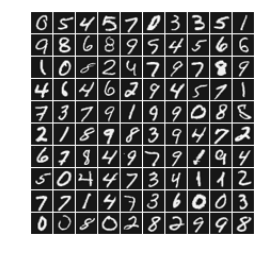

In [4]:
## Machine Learning Online Class - Exercise 4 Neural Network Learning

# Introductions
"""
이 파일은 linear 연습문제에서 시작하도록 도와준다.
이 연습문제에서 다음 함수들을 완성할 필요가 있다.

- sigmoidGradient.m
- randInitializeWeights.m
- nnCostFunciton.m

이 연습문제에 대해서, 이 파일에 있는 어떤 코드도 변경할 필요가 없다.
또는 위에서 언급된 파일들 이외의 것은 변경할 필요가 없다.
"""

# Initialization
# 연습문제를 위해 사용하게 될 파라미터를 설정한다.
input_layer_size = 400 # 20x20 크기의 입력 이미지 
hidden_layer_size = 25 # 25개의 hidden units
num_labels = 10 # 숫자 "0"은 label 10에 매핑했다

## =========== Part 1: Loading and Visualizing Data =============
"""
데이터셋을 로딩하고 가시화하는 것으로 시작한다.
당신은 필기체 숫자를 포함한 데이터셋으로 작업하게 된다.
"""

# training data를 로드한다.
print('Loading and Visualizing Data ...')

mat_content = sio.loadmat('ex4data1.mat')

# *********************************************************
# XXX: data loading 후에는 반드시 데이터의 차원을 확인해본다.
# *********************************************************
X = mat_content['X'] # array: 5000x400
y = mat_content['y'] # array: 5000x1
y = y.ravel() # array: 5000, 1차원 배열로 재설정한다.

m = X.shape[0]

# 임의로 100개의 데이터를 선택해서 표시한다.
rand_indices = np.arange(m)
random.shuffle(rand_indices)

sel = X[rand_indices[:100], :]
print(sel.shape) # 100x400

displayData(sel)

# X 데이터 확인
print(X.shape)
print(y.shape)
print(y[0:5])

In [5]:
## ================ Part 2: Loading Parameters ================
"""
여기에서는 미리 초기화된 neural network paramters를 로딩한다.
"""

print('Loading Saved Neural Network Parameters ...')

# Theta1, Theta2 변수에 가중치를 로드한다.
mat_content = sio.loadmat('ex4weights.mat')
Theta1 = mat_content['Theta1'] # 25x401
Theta2 = mat_content['Theta2'] # 10x26

print('Theta1.shape = ', Theta1.shape)
print('Theta2.shape = ', Theta2.shape)

# ********************************************************
# XXX: unroll parameters: np.append()를 사용한다.
# ********************************************************
# Unroll parameters, 파라미터를 1차원 벡터화 한다.
nn_params = np.append(Theta1, Theta2) # (10285,)


## ================ Part 3: Compute Cost (Feedforward) ================
"""
neural network에 대해서, cost 비용만 반환하는 neural network의 feedforward 부분을 
먼저 구현할 것이다. 

당신은 cost를 반환하는 nnCostfunction.m에 있는 코드를 완성해야 한다. 
비용을 계산하는 feedforward를 구현한 이후에는 구현이 올바른지 검증하게 되는데 
우리처럼 fixed debugging parameters와 같은 cost를 얻는지 비교해본다.

처음에는 *regularization 없이* feedforward cost를 구현할 것을 제안한다. 
그러면 디버깅하기 훨씬 쉬울 것이다.

나중에, part 4에서 regularized cost를 구현할 것이다.
"""

print()

Loading Saved Neural Network Parameters ...
Theta1.shape =  (25, 401)
Theta2.shape =  (10, 26)



In [6]:
# ****************************************
# XXX: 데이터 직렬화 및 복구 테스트
# ****************************************

a = np.array([[5, 6], [8, 9]])
b = np.array([[1, 6], [7, 8]])
c = np.append(a, b)
print(c) # 5, 6, 8, 9, 1, 6, 7, 8

# 아래 2개의 표현은 row 순서로 데이터를 복구한다.
d = c[0:4].reshape((2, 2))
e = c[0:4].reshape((2, 2), order='C')

print(d)

# 아래 표현은 column 순서로 데이터를 복구한다.
f = c[0:4].reshape((2, 2), order='F')

print(f)


[5 6 8 9 1 6 7 8]
[[5 6]
 [8 9]]
[[5 8]
 [6 9]]


In [7]:
## ================ Part 5: Sigmoid Gradient  ================
# neural network를 구현하기 전에 sigmoid 함수에 대한 gradient를 구현한다.
# 당신은 sigmoidGradient.m 파일의 코드를 완성해야 한다.

def sigmoidGradient(z):
    """
    이 함수는 z값을 가진 sigmoid 함수에 대한 gradient를 계산한다. 
    z가 행렬이든 벡터이든 상관없이 동작해야 한다. 
    특히 z가 벡터나 행렬이라면 각각의 요소에 대한 gradient를 반환해야 한다.
    """
    g = np.zeros(np.size(z))
    
    # ====================== YOUR CODE HERE ======================
    # 지시사항: z의 각 값에서 평가된 sigmoid function의 gradient를 계산한다.
    # (z는 행렬이나, 벡터 또는 스칼라가 될 수 있다).
    
    # z는 벡터이기 때문에 요소곱을 해야 한다.
    g = sigmoid(z) * (1 - sigmoid(z))
    
    return g

print('Evaluating sigmoid gradient...\n')
g = sigmoidGradient(np.array([1, -0.5, 0, 0.5, 1]))
# In Octave: 0.196612 0.235004 0.250000 0.235004 0.196612
print('Sigmoid gradient evaluated at [1, 0, -0.5, 0, 0.5, 1]:\n')
print(g)



Evaluating sigmoid gradient...

Sigmoid gradient evaluated at [1, 0, -0.5, 0, 0.5, 1]:

[ 0.19661193  0.23500371  0.25        0.23500371  0.19661193]


In [33]:

def nnCostFunction(nn_params, input_layer_size, hidden_layer_size, num_labels, X, y, s_lambda):
    """
    2개의 layer를 가진 neural network에 대한 cost function을 구현한다.
    neural network에 대한 파라미터는 벡터 nn_params로 "unrolled" 되었다. 그래서 
    가중치 행렬로 다시 변환할 필요가 있다.
    
    반환되는 파라미터 grad는 neural network의 편미분에 대한 "unrolled" 벡터여야 한다.
    """
    
    # nn_params를 파라미터 Theta1, Theta2로 재형성한다. Theta1, Theta2는
    # 2 layer neural network에 대한 가중치 행렬이 된다.
    Theta1 = nn_params[0:hidden_layer_size * (input_layer_size + 1)] \
        .reshape((hidden_layer_size, (input_layer_size + 1)))
    
    Theta2 = nn_params[(hidden_layer_size * (input_layer_size + 1)):] \
        .reshape(num_labels, (hidden_layer_size + 1))
        
    # 몇몇 유용한 변수들을 설정한다.
    m = X.shape[0]
    
    # 다음 변수를 올바르게 반환해야 한다.
    J = 0
    Theta1_grad = np.zeros(np.size(Theta1))
    Theta2_grad = np.zeros(np.size(Theta2))
    
    # ====================== YOUR CODE HERE ======================
    # 지시사항: 다음 파트를 통해 작업함으로써 코드를 완성해야 한다.
    
    """
    Part 1: neural network를 feedforward 실행하고 변수 J에 cost 를 저장해 리턴해라.
        Part 1을 구현한 이후에 ex4.m 에서 계산된 값과 검증해서 올바르게 계산되었는지 확인한다.
        
    Part 2: backpropagation 알고리즘을 구현해서 gradient 인 Theta1_grad, Theta2_grad 를 
        계산한다. 당신은 Theta1, Theta2를 가진 cost 함수의 편미분값을 Theta1_grad, Theta2_grad 로
        리턴해야 한다. Part 2ㄹㄹ 구현한 이후에는 checkNNGradients를 실행해서 구현이 올바른지 
        체크할 수 있다.
        
        Note: 벡터 y는 1..K 값을 가진 label의 벡터이다. 이 벡터를 1과 0으로 이루어진 binary vector로
            매핑해서 neural network의 cost 함수에 사용되도록 해야 한다.
    
        Hint: 처음에는 backpropagation 알고리즘을 training examples에 대해서 for-loop를 사용해 
            구현할 것을 권장한다.
        
    Part 3: cost함수와 gradients에 regularization을 구현한다.
        Hint: backpropagation 에 대해서 별개의 코드로 구현할 수 있다. 즉, regularization을 가지는
        gradients를 별개로 계산할 수 있고 그 값들을 Part 2의 Theta1_grad, Theta2_grad 값에
        더할 수 있다.
    """
    
    #% PART 1: 
    #% ================
    #% input layer: 400
    #% hidden layer: 25
    #% output layer: 10
    #% X: 5000x400 
    #% a1: 5000x401 => x항에 bias 추가됨
    #% z2: 5000x25 => a1 * Theta1' = 5000x401 * (25x401)' = 5000x25
    #% a2: 5000x26 => a2 항에 bias 추가됨
    #% z3: 5000x10 => a2 * Theta2' = 5000x26 * (10x26)' = 5000x10
    #% a3: 5000x10 => sigmoid(z3)
    #% d3: 5000x10
    #% d2: 5000x25
    #% Theta1, Delta1 and Theta1_grad: 25x401
    #% Theta2, Delta2 and Theta2_grad: 10x26
    
    # 1) 1의 컬럼벡터 추가, m: size of X rows
    a1 = hstack((np.ones((m, 1)), X))
    X = a1
    
    # 2) z 계산 시 theta x X' 형식을 취한다.
    # a2의 출력값 계산
    z2 = a1.dot(Theta1.T) # 5000x401 * (25x401)'
    a2 = sigmoid(z2)
    
    # 3) 다음 단계의 hidden layer에 대한 입력은 mxn 형태로 만든다.
    a2 = hstack((np.ones((a2.shape[0], 1)), a2))
    z3 = a2.dot(Theta2.T) # 5000x26 * (10x26)'
    a3 = sigmoid(z3)
    
    # 4) y값의 벡터화는 mxn 형태로 만든다. 5000x10
    # y는 각 값에 대해서 하나의 row 벡터를 가져야 한다.
    # "0" => 9 index, "1" => 0 index, "2" => 1 index,,, "9" => 8 index
    y_exp = np.zeros((m * num_labels))
    for i in np.arange(m):
        y_exp[i * num_labels + y[i] - 1] = 1
        
    y_exp = y_exp.reshape((m, num_labels))
    
    # 5) cost J 값을 구한다. J: 1x10
    J = 1/m * np.sum(-y_exp * log(a3) - (1-y_exp) * log(1-a3))
    J = np.sum(J) # first answer, unregularized cost
    


    print (J)
    
    """
    XXX: indexing 조심한다. 
    Octave: sum_theta_square1 = sum(sum(Theta1(:, 2:end) .^ 2)); 인데
    여기서 2:end가 python에서는 1: 임을 유의해야겠다. 계산이 잘못되서 sum_theta_square2값이 틀렸다.
    """
    sum_theta_square1 = np.sum(np.sum(Theta1[:, 1:] ** 2)) # In Octave: 392.58
    sum_theta_square2 = np.sum(np.sum(Theta2[:, 1:] ** 2)) # In Octave: 568.82
    
    
    reg_term = s_lambda / (2*m) * (sum_theta_square1 + sum_theta_square2)
    J = J + reg_term # second answer
    
    # PART 2:
    # ===================
    
    # Delta는 Theta와 dimension이 동일하다. 미리 초기화 한다.
    Delta1 = np.zeros_like(Theta1)
    Delta2 = np.zeros_like(Theta2)
    
    # 모든 샘플들에 대해서 for-loop를 실행한다.
    for t in np.arange(m):
        
        # spte 1:
        # -------------
        a1 = X[t, :] # a1: 1x401
        z2 = a1.dot(Theta1.T) # 1x401 x (25x401)'
        a2 = sigmoid(z2)
        # z2, a2: 1x25
        
        
        # 1을 a2 행렬에 추가한다.
        a2 = np.append(1, a2)
        z3 = a2.dot(Theta2.T) # 1x26 * (10x26)'
        a3 = sigmoid(z3)
        # z3, a3: 1x10
        
        # step 2:
        # -------------
        d3 = (a3 - y_exp[t, :]) # d3: 1x10
        
        # step 3:
        # -------------
        d2 = d3.dot(Theta2[:, 1:]) # 1x10 * 10x25
        d2 = d2 * sigmoidGradient(z2)
        
        # step 4: 
        # -------------
        # 행렬 계산을 위해서 차원을 조정한다. (25,) => (1,25)
        d2 = np.array([d2])
        a1 = np.array([a1])
        
        d3  = np.array([d3])
        a2 = np.array([a2])

        Delta1 = Delta1 + d2.T.dot(a1) # d2: 1x25, a1: 1x401
        Delta2 = Delta2 + d3.T.dot(a2)
        
    # step 5: 
    # -------------
    Theta1_grad = 1/m * Delta1
    Theta1_grad[:, 1:] = Theta1_grad[:, 1:] + (s_lambda/m) * Theta1[:, 1:]
    
    Theta2_grad = 1/m * Delta2
    Theta2_grad[:, 1:] = Theta2_grad[:, 1:] + (s_lambda/m) * Theta2[:, 1:]
    
    # Unroll gradients
    grad = np.append(Theta1_grad, Theta2_grad)
    
    print ("gradient:...")
    print (grad)
    
    return J, grad
    #return J
    
print('Feedforward Using Neural Network ...\n')

# Weight regularization paramter (여기서는 0으로 설정한다.)
s_lambda = 0

J, grad = nnCostFunction(nn_params, input_layer_size, hidden_layer_size, \
                  num_labels, X, y, s_lambda)

print('Cost at parameters (loaded from ex4weights): %f \
          \n(this value should be about 0.287629)\n' % J);



Feedforward Using Neural Network ...

0.336929380959
gradient:...
[ -8.83616097e-04   0.00000000e+00   0.00000000e+00 ...,   1.11672428e-04
   4.71463658e-04   3.16011350e-05]
Cost at parameters (loaded from ex4weights): 0.336929           
(this value should be about 0.287629)



### 1.4 Regularized cost function

regularization을 가진 neural network의 cost 함수는 다음과 같다.

[수식]

당신은 neural network는 단지 3개의 layer만 가질 수 있다고 가정할 수 있다. - input layer, hidden layer 그리고 output layer. 어쨌든, 당신의 코드는 input unit, hidden unit 그리고 output unit이 몇개이든 상관없이 동작해야 한다. 우리는 명시적으로 $ \Theta^{(1)}, \Theta^{(2)} $에 대한 인덱스를 명시했지만, **당신의 코드는 일반적인 $ \Theta^{(1)}, \Theta^{(2)} $의 사이즈에 상관없이 동작해야 한다.** 행렬 Theta1, Theta2에 대해서 이것은 각각의 매트릭스 첫번째 컬럼에 일치한다. (???) regularization을 cost 함수에 추가해라. 

**당신은 unregularized cost 함수를 첫번째로 계산하고 나중에 regualrization 항목을 cost에 추가할 수 있다.**

일단, 작업이 완료되면 ex4.m 은 Theta1, Theta2, lambda = 1에 대한 파라미터를 로드해서 nnCostFunction를 호출한다. 약 0.383770을 볼 수 있어야 한다.

_You should now submit your solutions._

In [32]:
## =============== Part 4: Implement Regularization ===============
# 일단, cost 함수 구현이 올바르다면 cost를 가진 regularization을 구현할 수 있다.

print('Checking Cost Function (w/ Regularization) ... \n')

# Weight regularization parameter (여기서는 1로 설정한다.)
s_lambda = 1

J, grad = nnCostFunction(nn_params, input_layer_size, hidden_layer_size, \
                  num_labels, X, y, s_lambda)

print('Cost at parameters (loaded from ex4weights): %f ' \
        '\n(this value should be about 0.383770)\n' % J)



Checking Cost Function (w/ Regularization) ... 

0.336929380959
[ -8.83616097e-04  -1.59532666e-05  -1.78870525e-05 ...,  -2.46828737e-04
   5.89989391e-04   2.57361669e-04]
Cost at parameters (loaded from ex4weights): 0.457246 
(this value should be about 0.383770)



## 2. Backpropagation

여기에서는 neural network cost 함수에 대한 gradient를 계산하기 위해서 backpropagation 알고리즘을 구현할 것이다. 당신은 **nnCostFunction.m 을 완성해서 grad로 적절한 값을 반환해야 한다.** gradient를 계산하게 되면, **neural network를 훈련시킬 수 있는데 fmincg와 같은 향상된 최적화 advanced optimizer 를 이용해서 cost function $ J(\Theta) $를 최소화 시킴으로서 가능하다.**

먼저 **(unregularized) neural network에 대한 파라미터의 gradient를 계산하는 backpropagation 알고리즘을** 구현한다. unregularized 경우 gradient 계산이 올바르다고 한다면, regularized neural network에 대한 gradient를 구현한다.

### 2.1 Sigmoid gradient

연습문제 시작을 됩기 위해서, 먼저 sigmoid gradient 함수를 구현한다. sigmoid 함수에 대한 gradient는 다음처럼 계산될 수 있다. 

[수식]

여기서

$ sigmoid(z) = g(z) = \frac{1}{1 + e^{-z}} $

함수구현을 마치면, sigmodGradient(z)를 호출해서 몇가지 값들을 테스트 할 수 있다. **큰 값 z에 대해서 (양수와 음수 모두) gradient는 거의 0에 가까워야 한다. z = 0일때는 gradient는 정확히 0.25가 된다.** (역주: 0.5 * (1 - 0.5)니까 0.25가 된다) 당신의 코드는 벡터와 행렬에 대해서 동작해야 한다. 행렬에 대해서, 함수는 각 요소에 대해서 sigmoid gradient 함수를 수행해야 한다.

_You should now submit your solutions._

### 2.2 Random initialization

**neural networks를 훈련시킬 때, 파라미터를 무작위로 초기화 해서 symmetry를 깨트리는 것이 중요하다.** 무작위로 초기화하는 효율적 전략은 **특정 범위 [ $ -\epsilon_{init}, \epsilon_{init}  $ ] 내에서 균일하게 $ \Theta^{(l)} $  에 대한 값을 무작위로 선택하는** 것이다. 당신은 **$ \epsilon_{init} = 0.12 $** 를 사용해야 한다. (주석 2: e_init을 선택하는 한가지 효율적인 전략은 네트워크내의 unit 수에 의존하는 것이다. (TODO: 생략)) 이 값의 범위는 파라미터가 작게 유지하고 더 효율적으로 학습할 수 있게 보증한다.

당신의 작업은 Theta에 대한 가중치를 초기화 하기 위해서 randInitializeWeights.m을 완성하고 다음 코드를 추가해라.

```
% Randomly initialize the weights to small values
epsilon init = 0.12;
W = rand(L out, 1 + L in) * 2 * epsilon init 􀀀 epsilon init;
```

_You do not need to submit any code for this part of the exercise._

In [14]:

# Part 6: Initializing Parameters
"""
여기에서는 숫자를 분류하는 2개의 layer를 가진 neural network 구현한다. 
neural network의 가중치를 초기화 하는 함수를 구현하면서 시작한다. (randInitializeWeights.m)
"""

def randInitializeWeights(L_in, L_out):
    """
    L_in 들어오는 연결과 L_out 나가는 연결을 가진 layer의 가중치를 무작위로 초기화 한다.
    이 함수는 L_in 개의 들어오는 연결과 L_out 개의 나가는 연결을 가진 layer의 가중치를
    임의로 초기화 한다.
    
    W는 W의 컬럼으로 "bias" 항목을 다루기 위해서 (L_out, 1 + L_in) 크기의 행렬로
    설정됨을 주목해라.
    """
    
    # 다음 변수를 올바르게 반환해야 한다.
    W = np.zeros((L_out, 1 + L_in))
    
    # ====================== YOUR CODE HERE ======================
    """
    지시사항: neural network를 훈련시킬때, symmetry를 깨트리기 위해서 W를 무작위로 초기화한다.
    
    Note: W의 첫번째 행은 bias unit에 대한 파라미터에 일치한다.
    """
    
    epsilon_init = 0.12
    # **********************************************************************
    # XXX: np.randomrand(rows, columns): 0~1사이의 값을 랜덤하게 출력한다.
    # **********************************************************************
    W = np.random.rand(L_out, 1 + L_in) * 2 * epsilon_init - epsilon_init
    
    return W


initial_Theta1 = randInitializeWeights(input_layer_size, hidden_layer_size);
initial_Theta2 = randInitializeWeights(hidden_layer_size, num_labels);

#Unroll parameters
initial_nn_params = np.append(initial_Theta1, initial_Theta2)

print (initial_Theta1.shape)
print (initial_Theta2.shape)

(25, 401)
(10, 26)


## 2.3 Backpropagation

[Figure 3: Backpropagation Updates.]

이제, backpropagation 알고리즘을 구현할 차례이다. backpropagation 알고리즘 뒤에 있는 직관은 다음과 같음을 기억하자. 

__주어진 training example (x(t), y(t))가 있을 때, 우리는 처음에 "forward pass"를 실행해서 네트워크 전체를 통해서 모든 activation을 계산하고 가설함수 $ h_{\Theta}(x) $의 출력값도 계산한다. 그리고 나서 layer l에서 각각의 node j에 대해서 우리는 "error term" $ \delta_{j}^{(l)} $를 계산하는데 그 node가 출력에 있어서의 오류들에 대해서 얼마나 "responsible" 책임이 있는지 측정하게 된다.__

__하나의 output node에 대해서, 우리는 네트워크의 activation과 실제 target value 사이의 차이를 직접 측정할 수 있다. 그리고 $ \delta_{j}^{(3)} $ (왜냐하면 layer 3은 output layer이니까) 정의하기 위해 그 (차이)값을 사용한다. hidden unit에 대해서 $ \delta_{j}^{(l)} $를 계산하는데 (l + 1) layer에 있는 node들이 error term에 대한 가중치 평균에 기초하게 된다.__

__자세히 본다면, 여기에 backpropagation 알고리즘이 있다(또한 그림 3에 표시된). 당신은 한번에 하나의 example을 처리하는 step 1 에서 4까지를 loop 내에서 구현해야 한다. 구체적으로 당신은 하나의 for-loop를 구현해야 하는데 for t = 1:m 이 될 것이고 for-loop 안에 step 1-4를 놓아야 한다. t번째 반복에서는 t번째 training example (x(t), y(t))를 계산한다. Step 5 는 누적된 gradient를 m으로 나누어서 neural network cost 함수에 대한 gradient 를 구하게 된다.__

1. input layer의 값들(a(1))을 t번째 training example x(t)로 설정한다. feedforward pass를 수행하고(그림 2), layer 2와 3에 대해서 activation(z(2), a(2), z(3), a(3))를 계산한다. **a + 1 항목을 추가해서 layer a(1), a(2)에 대한 activations의 벡터가 bias unit을 포함하고** 있음을 확인해라. Octave/MATLAB에서 a_1이 컬럼 벡터라면 1을 추가하는 것은 a_1 = [1; a_1]과 같다.

2. layer 3(output layer)에 있는 output unit k 각각에 대해서 d(3) = (a(3) - y)로 설정해라. [수식 생략] 여기서 y는 0 또는 1인데, **현재 training example이 클래스 k에 속하면 y(k) = 1이 되고 다른 클래스라면 y(k) = 0이 된다.** 이 작업을 위해서 logical array가 도움이 될 것이다. (이전 프로그래밍 연습문제에서 설명되었다)

3. hidden layer l = 2 에서 다음과 같이 설정하라. [수식 생략]

4. 다음 공식을 이용해서 이 예제의 gradient를 누적시킨다. $ \delta_{0}^{(2)} $에 대해서 생략하거나 삭제할 수 있다. Octave/MATLAB에서 $ \delta_{0}^{(2)} $를 제거하는 것은 delta_2 = delta_2(2:end)와 같이 사용한다. [수식 생략]

5. neural network cost function에 대해서 (unregularized) gradient를 구하는데, 누적된 gradient를 1/m 으로 나누면 된다. [수식 생략]


Octave/MATLAB Tip: 당신은 feedforward와 cost function을 성공적으로 완성한 후에 backpropagation 알고리즘을 구현해야 한다. backpropagation 알고리즘을 구현하는 동안, **Octave/MATLAB에서 "nonconformant arguments"와 같은 차원 불일치 에러를 만난다면 현재 작업중인 변수의 사이즈를 출력하기 위해 size 함수를 사용하는 것은** 종종 유용하다. 


backpropagation 알고리즘을 구현한 이후에 스크립트 ex4.m은 구현된 내용으로 **gradient checking을 실행할 것이다.** gradient check는 당신의 코드가 gradient를 올바르게 구현했음을 확신시켜 준다.


### 2.4 Gradient checking

당신의 neural network에서 당신은 cost function $ J(\Theta) $를 최소화 할 것이다. 파라미터에 대한 gradient checking을 수행하기 위해서, 파라미터 $ \Theta^{(1)}, \Theta^{(2)}  $를 벡터 $ \theta $로 "unrolling" (풀어 헤치는, 1차원 배열로 만드는) 것을 상상할 수 있다. 그렇게 함으로써, cost function이 대신 $ J(\Theta) $가 되는 것으로 생각할 수 있고 다음의 gradient checking 절차를 사용할 수 있다.

__알려진대로 J(theta)의 미분값을 계산하는 함수 $ f_{i}(\theta) $ 가지고 있다고 하자, 당신은 $ f_{i} $가 올바르게 미분값을 내는지 체크하고 싶다.__

[수식]

그래서 ** $ \theta^{(i+)} $가 theta와 같지만, 예외적으로 i번째 요소가 e 만큼 증가했다고 하고, 유사하게 $ \theta^{(i-)} $ 가 e만큼 i번째 요소가 감소되었다고 하자. 이제 수치적으로 f의 올바름을 각각의 i에 대해서 다음과 같이 체크함으로써 올바름을 검증할 수 있다. **

[수식]

__2개 값에 대한 차이는 근사치로 서로 비슷할텐데 그것은 J의 상세 구현에 의존한다. 만약 $ \epsilon = 10^{-4} $이라고 가정하자. 그러면 위 수식의 왼쪽과 오른쪽은 최소한 4 significant digit에 일치하게 될 것을 알게 될 것이다. (???)__

우리는 **computeNumericalGradient.m에서 수치적으로 gradient를 계산하는 함수를** 구현했다. 해당 파일을 수정할 필요는 없지만, 어떻게 동작하는지 보고 이해할 것을 권장한다.

ex4.m의 다음 단계에서, 제공된 함수 checkNNGradients.m을 실행시키는데, 그것은 작은 neural network와 dataset을 생성하고 당신의 gradient를 체크하는데 사용된다. 만약 backpropagation 알고리즘이 올바르다면, 1e-9보다 작은 상당히 작은 차이점을 보게 될 것이다.


**Practical Tip:** gradient 체킹을 수행할 때, 상대적으로 작은 수의 input unit과 hidden unit을 가진 작은 neural network를 사용하는 것이 더욱 효율적인데, 상당히 작은 수의 파라미터를 갖기 때문이다. theta의 각 차원은 cost 함수에 대한 2가지 평가를 요구하는데, 이것은 비용이 비쌀 수 있다. checkNNGradients 함수에서 우리의 코드는 작은 random model과 dataset을 생성하는데 그것은 gradient checking을 위해서 computeNumericalGradient와 함께 사용될 수 있다. __마지막으로 당신의 gradient 계산이 올바르다고 확신하면, learning 알고리즘을 실행시키기 전에 gradient checking을 꺼야만 한다.__



**Practical Tip:** __gradient checking은 cost와 gradient를 계산하는 어떤 함수에 대해서도 동작한다. 구체적으로 당신은 동일한 computeNemericalGradient.m 함수를 사용할 수 있는데, 만약 당신의 gradient 구현이 다른 연습문제에 대해서도 또한 올바르게 동작하는지 체크할 수 있다.__ (예를 들어, logistic regression의 cost 함수처럼)


_일단 당신의 cost function이 (unregularized) neural network cost function에 대한 gradient check를 통과한다면, 당신은 neural network gradient function (backpropagation) 을 제출해야 한다._


### 2.5 Regularized Neural Networks

성공적으로 backpropagation 알고리즘을 구현한 이후에는, gradient에 regularization을 추가해야 한다. regularization을 염두에 두기 위해서, backpropagation 을 사용한 gradient 계산 이후에 부가적인 항목으로 이것을 추가하면 된다.

특별히 backpropagatin을 이용해서 $ \Delta_{ij}^{(l)} $ 계산한 이후에, 다음을 사용해서 regularization을 추가해야 한다.

[수식]

**당신은 bias 항목을 위해 사용되는 $ \Theta^{(l)} $ 의 첫번째 컬럼을 regularizing 하지 않아야 함을 주의해라.** 더우기, 파라미터 $ \Theta_{ij}^{(l)} $ 에서, i는 1부터 인덱스가 시작하고 j는 0부터 인덱스가 시작된다. 따라서

[수식]

다소 혼동스러운데, Octave/MATLAB 에서 인덱싱은 1 부터 시작한다. (i와 j 모두). 따라서 Theta1(2, 1)은 실제로 $ \Theta_{2, 0}^{(l)} $ 에 일치한다. (예를 들어, 위에서 보여진 행렬 $ \Theta^{(1)} $ 의 2번째 행에 첫번째 컬럼에 있는 항목이 된다.)

이제 코드를 수정해서 nnCostFunction 에 있는 grad를 계산하고 regularization을 염두에 둔다. 그렇게 하고 난 후, ex4.m 스크립트는 당신의 구현 상에서 gradient checking을 실행할 것이다. 당신의 코드가 올바르다면, 1e-9 보다 적은 상대적 차이를 보아야 한다.

_You should now submit your solutions._

### 2.6 Learning parameters using fmincg

당신이 성공적으로 neural network cost function과 gradient 계산을 구현한 이후에는, ex4.m 스크립트의 다음 단계는 fmincg를 사용해서 좋은 파라미터 set을 학습할 것이다.

훈련이 완료된 이후에, ex4.m 스크립트는 올바르게 얻은 examples의 비중을 계산해서 당신의 classifier에 대한 training 정확도를 보고할 것이다.

만약 당신의 구현이 올바르다면, **약 95.3%의 training 정확도를 볼 수 있다. (이것은 임의 초기화 때문에 약 1% 정도 달라질 수 있다.) **

neural network를 더 많이 반목해서 훈련시키면 더 높은 training 정확도를 얻는 것도 가능하다. 우리는 당신이 더 많은 반복으로 neural network를 훈련시킬 것을 권장한다. (예를 들어 MaxIter 를 400으로 설정하기) 그리고 또한 regularization 파라미터 lambda도 다르게 해보아라.

옳은 학습 설정으로, neural network가 완벽히 training set에 적합함을 얻을 수 있다.


## 3. Visualizing the hidden layer

**당신의 neural network가 학습한 것을 이해하기 위한 한 가지 방법은 hidden layer에 의해 캡쳐된 표현을 가시화** 하는 것이다. **비공식적으로, 주어진 특정 hidden unit에서, 그것이 계산하는 것을 가시화 하는 한 가지 방법은 activate 활성화를 유발하는 입력 x를 찾는 것이다. (즉, 1에 가까운 activation 값 $ ( a_{i}^{(l)} ) $ 을 갖는). **

당신이 훈련시킨 neural network에 대해서, **$ \Theta^{(1)} $ 의 i-번째 행은 401-차원의 벡터인데 i번째 hidden unit에 대한 파라미터를** 나타낸다.

만약 우리가 bias 항목을 버린다면, 우리는 각 입력 픽셀에서 hidden unit까지 가중치를 나타내는 400 차원의 벡터를 얻게 된다.

그래서, hidden unit에 의해 캡쳐된 "표현"을 가시화 하는 한 가지 방법은 이 **400 차원의 벡터를 20 x 20 이미지로 reshape 재형성하고** 그것을 그리는 것이다. (각주 3: 이것은 hidden unit에 대한 가장 높은 activation을 주는 입력값을 찾는 것과 동일하다는 것이 드러난다. 입력 상에서 주어진 "norm" 제약으로...)

ex4.m의 다음 단계는 displayData 함수를 사용해서 이렇게 하고 (Figure 4와 유사한) 이미지를 보여주는데 25개로 구성된 하나의 이미지가 된다. 각각은 네트워크에서 한개의 hidden unit에 일치한다.

당신의 훈련된 네트워크에서, 당신은 hidden units이 대략적으로 검출된 것과 일치하는데 그것은 입력 내에서의 다른 패턴들과 strokes를 나타낸다.

[Figure 4: Visualization of Hidden Units.]


### 3.1 Optional (ungraded) exercise

연습문제 이 부분에서, 당신은 neural network에 대한 서로 다른 learning 설정을 시도해보고 neural network의 성능이 regularization 파라미터 lambda와 training 단계 수에 따라 어떻게 달라지는지 확인해 볼 것이다. (fmincg 사용할 때 MaxIter 옵션)

Neural networks는 매우 복작합 의사결정 경계선을 형성할 수 있는 매우 강력한 모델이다. regularization 없이, neural network가 training set에 "overfit" "과적합" 하도록 동작하는 것도 가능하다. 그래서 training set에 100% 정확도에 가깝게 얻을 수 있다. 그러나 이전에 본 적이 없는 새로운 examples에 대해서는 그다지 잘 맞지 않는다. 

**당신은 regularization lambda를 더 작은 값으로 설정할 수 있고 MaxIter 파라미터는 좀더 높은 반복횟수 값으로 설정해서 이것이 어떻게 달라지는지 스스로 볼 수 있다.**

당신은 또한 학습 파라미터 lambda와 MaxIter를 변경할 때 hidden units의 가시화에서의 변경 사항을 볼 수 있을 것이다.

_You do not need to submit any solutions for this optional (ungraded) exercise._


In [15]:

def debugInitializeWeights(fan_out, fan_in):
    """
    이 함수는 fan_in 들어오는 연결수와 fan_out 나가는 연결수를 가진 layer의 가중치를 
    고정된 전략을 이용해서 초기화 시킨다. 이것은 나중에 디버깅할 때 도움이 된다.
    
    Note: W는 "bias" 항목을 다루는 첫번째 행이 추가되기 때문에 행렬의 크기는 
    (1 + fan_in, fan_out)으로 설정한다.
    """
    
    W = np.zeros((fan_out, 1 + fan_in))
    
    # "sin"을 이용해서 W를 초기화한다. 이것은 W가 항상 같은 값임을 보증하고
    # 또한 디버깅에 유용하다.
    a = np.arange(np.size(W)) + 1
    a = np.sin(a) / 10
    
    # ***************************************************************
    # XXX: order='F' 옵션을 주어서 컬럼 우선순위로 채워지게 한다.
    # 포트란의 컬럼 우선순위,  C의 로우 우선순위
    # row 우선순위로 하면 debug_J 값이 틀려진다.
    # ***************************************************************
    W = a.reshape((fan_out, 1 + fan_in), order='F')
    
    return W


def computeNumericalGradient(J, theta):
    """
    "finite differences" 방법으로 gradient를 계산하고 gradient의 수치적 근사값을 제공한다.
    numgrad = COMPUTENUMERICALGRADIENT(J, theta) 는 theta 주변에서 함수 J 의 numerical gradient를 계산한다.
    y = J(theta)는 theta에서의 함수 값을 반환해야 한다.
    
    Notes: 다음의 코드는 numerical gradient 체킹을 구현하고, numerical gradient를 반환한다.
        numgrad(i)를 (수치적으로 근사치인) J의 편미분 값으로 설정하는데, J는 theta 에서 평가된 i번째 입력 인자와
        관련이 있다. (즉, numgrad(i) 는 (근사적으로) theta(i)에 대해서 J의 편미분 값이 된다.)
    """
    size_theta = np.size(theta)
    
    numgrad = np.zeros(size_theta)
    perturb = np.zeros(size_theta)
    e = 1e-4
    
    # for p = 1:numel(theta)
    for p in np.arange(size_theta): 
        # Set perturbation vector
        perturb[p] = e
        
        # J가 cost, gradients를 반환하기 때문에 grad를 추가로 붙였다.
        loss1, grad = J(theta - perturb)
        loss2, grad = J(theta + perturb)
        
        # Compute Numerical Gradient
        numgrad[p] = (loss2 - loss1) / (2*e)
        perturb[p] = 0
 
    return numgrad


# 아래 함수는 backpropagation 알고리즘이 올바르게 구현되었는지를 검증하기 위해서
# 작은 neural network를 만들어 gradient를 계산하고(analytic) 수치적으로 (numerical)
# 계산된 gradient 값을 서로 비교한다. 올바르게 구현되었다면 2개의 값은 매우 유사해야 한다.
def checkNNGradients(s_lambda = 0):
    """
    작은 neural network를 생성해서 backpropagation gradients를 검증한다.
    checkNNGradients는 당신의 backprop code를 통해서 analytical gradients (분석적 gradients)와
    numerical gradients(computeNumericalGradient 함수를 통해서 계산된)를 출력한다.
    이들 두 개의 gradient 계산은 매우 유사한 값들이어야 한다.
    """
    
    input_layer_size = 3
    hidden_layer_size = 5
    num_labels = 3
    m = 5
    
    # 우리는 몇가지 '무작위' 테스트 데이터를 생성한다.
    Theta1 = debugInitializeWeights(hidden_layer_size, input_layer_size)
    Theta2 = debugInitializeWeights(num_labels, hidden_layer_size)
    
    """
    Checking Backpropagation... 
    X =

       0.084147  -0.027942  -0.099999
       0.090930   0.065699  -0.053657
       0.014112   0.098936   0.042017
      -0.075680   0.041212   0.099061
      -0.095892  -0.054402   0.065029

    y =

       2
       3
       1
       2
       3
    """
    # 행렬 X를 생성하기 위해 debugInitializeWeights를 재사용한다.
    X = debugInitializeWeights(m, input_layer_size - 1)
    y = 1 + ((np.arange(m) + 1) % num_labels) # Octave 에 맞추느라 1을 더했다.
    
    # Unroll parameters, 파라미터를 풀어헤친다.
    nn_params = np.append(Theta1, Theta2)
    
    # 1) 직접 구현한 analytical 알고리즘으로 cost와 gradient를 계산한다.
    # *********************************************************************************************
    # XXX: In Octave: cost 함수에 대한 단축 참조를 생성한다. 
    # ex) costFunc = @(p) nnCostFunction(p, a, b) <=> costFunc = lambda p: nnCostFunction(p, a, b)
    # *********************************************************************************************
    # costFunc = @(p) nnCostFunction(p, input_layer_size, hidden_layer_size, num_labels, X, y, lambda);
    costFunc = lambda p: nnCostFunction(p, input_layer_size, hidden_layer_size, \
                                        num_labels, X, y, s_lambda)
    cost, grad = costFunc(nn_params)
    
    cost, grad = nnCostFunction(nn_params, input_layer_size, hidden_layer_size, \
                                num_labels, X, y, s_lambda)
    
    # 2) nemerical 방법으로 cost와 gradient를 계산한다.
    numgrad = computeNumericalGradient(costFunc, nn_params);
    
    # 가시적으로 2개의 gradient 계산을 검사한다. 2개의 컬럼값은 매우 유사해야 한다.
    # XXX: disp([numgrad grad]); <=> print(np.array([numgrad, grad]).T)
    print(np.array([numgrad, grad]).T)
    
    print('\n The above two columns you get should be very similar.')
    print('(Left-Your Numerical Gradient, Right-Analytical Gradient)\n')
    
    # 2 솔루션 사이의 차이에 대해서 정규화를 평가한다.
    # 만약 올바른 구현을 했다면, 그리고 EPSILON = 0.0001 을 computeNumericalGradient.m 에서 
    # 사용했다고 가정한다면 아래의 diff 값은 1e-9 보다 작아야 한다.
    diff = np.linalg.norm(numgrad-grad) / np.linalg.norm(numgrad+grad)
    print('If your backpropagation implementation is correct, then')
    print('the relative difference will be small (less than 1e-9).')
    print('Relative Difference: %s' % diff) # In Octave: 2.25381e-11
    
    


In [16]:
## =============== Part 7: Implement Backpropagation ===============
"""
일단, cost가 우리것하고 일치한다면, neural network에 대한 backpropagation 알고리즘을
구현할 수 있다. nnCostFunction.m 에 코드를 추가해서 파라미터의 편미분값을 반환하게 해야 한다.
"""

print('Checking Backpropagation...')

# checkNNGradients를 실행해서 gradients를 체크한다.
checkNNGradients(0)

## =============== Part 8: Implement Regularization ===============
# 일단, backpropagation 이 올바르다면, 당신은 이제 cost와 gradient를 가진 
# regularization을 구현할 수 있다.

print('\nChecking Backpropagation (w/ Regularization) ...')

# heckNNGradients를 실행해서 gradinets를 체크한다.
s_lambda = 3
checkNNGradients(s_lambda)

# 또한 costFunction 디버깅 값을 출력한다.
debug_J, grad  = nnCostFunction(nn_params, input_layer_size, hidden_layer_size, num_labels, X, y, s_lambda);

print('\n\nCost at (fixed) debugging parameters (w/ lambda = 10): %s \
    \n(this value should be about 0.576051)\n\n' % debug_J)



Checking Backpropagation...
[[-0.66442852 -0.67112625 -0.69823952]
 [-0.66439043 -0.67111422 -0.69826558]
 [-0.66443813 -0.67125588 -0.69837357]
 [-0.66452776 -0.671421   -0.69846416]
 [-0.66457679 -0.67145747 -0.69845392]]
[[-0.66442852 -0.67112625 -0.69823952]
 [-0.66439043 -0.67111422 -0.69826558]
 [-0.66443813 -0.67125588 -0.69837357]
 [-0.66452776 -0.671421   -0.69846416]
 [-0.66457679 -0.67145747 -0.69845392]]
[[-0.6644276  -0.67112508 -0.69823917]
 [-0.66438951 -0.67111305 -0.69826523]
 [-0.66443721 -0.67125471 -0.69837322]
 [-0.66452684 -0.67141983 -0.69846381]
 [-0.66457587 -0.6714563  -0.69845357]]
[[-0.66442944 -0.67112742 -0.69823987]
 [-0.66439135 -0.67111539 -0.69826593]
 [-0.66443904 -0.67125705 -0.69837392]
 [-0.66452868 -0.67142217 -0.69846452]
 [-0.6645777  -0.67145864 -0.69845427]]
[[-0.66442844 -0.67112615 -0.69823949]
 [-0.66439035 -0.67111411 -0.69826555]
 [-0.66443811 -0.67125587 -0.69837356]
 [-0.66452783 -0.67142108 -0.69846419]
 [-0.66457688 -0.67145759 -0.698

In [30]:
## =================== Part 8: Training NN ===================
"""
이제 neural network를 훈련시키기 위해 필요한 모든 코드를 구현했다.
neural network를 훈련시키기 위해서, 우리는 "fmincg"를 사용하는데,
그것은 "fmiunc"와 비슷하게 동작하는 함수이다. 이들 향상된 optimizers는 
우리의 cost 함수를 효율적으로 훈련시키는데 우리는 gradient 계산을 함께
제공해 주어야 한다.
"""

print ('Training Neural Network...')

# 과제를 완료한 이후에, MaxIter를 큰 값으로 변경해서 training에 얼마나 도움이
# 되는지를 확인해라.

# lambda를 서로 다른 값으로 시도해 보아라.
s_lambda = 1

# 최소화 하게 될 cost 함수에 대한 "short hand"를 생성한다.
costFunc = lambda p: nnCostFunction(p, input_layer_size, hidden_layer_size,
                                       num_labels, X, y, s_lambda)[0]
gradFunc = lambda p: nnCostFunction(p, input_layer_size, hidden_layer_size,
                                   num_labels, X, y, s_lambda)[1]

import scipy.optimize as op

# 이제, costFunction은 단지 하나의 인자만 취하는 함수가 된다. (neural network parameters)
#nn_params, cost = fmincg(costFunction, initial_nn_params, options)
        
Result = op.minimize(fun = costFunc, x0 = initial_nn_params, \
                     method = 'CG', jac = gradFunc, options = {'disp': True, 'maxiter': 50});

"""
In Octave: 
Training Neural Network... 
Iteration    50 | Cost: 4.781041e-01
nn_params =

  -9.0296e-01
  -1.3338e+00
   7.0494e-01
   5.4052e-01
"""
nn_params = Result.x
cost = Result.fun

print (cost)

Training Neural Network...
7.31235868303
7.31235868303
3.34791446288
3.34791446288
3.25676261086
3.25676261086
3.23702333458
3.23702333458
3.22588108097
3.22588108097
3.18814968769
3.18814968769
3.14781346165
3.14781346165
3.0615557754
3.0615557754
3.15522420287
3.15522420287
2.98213826988
2.98213826988
2.68830318577
2.68830318577
2.56065508418
2.56065508418
2.46598289923
2.46598289923
2.0940976004
2.0940976004
1.98186113704
1.98186113704
1.95226076683
1.95226076683
1.85236507133
1.85236507133
1.8019839419
1.8019839419
1.67951986005
1.67951986005
1.58514992734
1.58514992734
1.51313198081
1.51313198081
1.47819294094
1.47819294094
1.4180661768
1.4180661768
1.36684632137
1.36684632137
1.30767587095
1.30767587095
1.20643122356
1.20643122356
1.11551710607
1.11551710607
1.0615321157
1.0615321157
1.02470819866
1.02470819866
0.992710792792
0.992710792792
0.961482056908
0.961482056908
0.910457186778
0.910457186778
0.874865460181
0.874865460181
0.837379032771
0.837379032771
0.818655659234
0.8186

In [16]:
# Theta1, Theta2를 nn_params에서 구한다.
"""
Theta1 = nn_params[0:hidden_layer_size * (input_layer_size + 1)]
    .reshape((hidden_layer_size, (input_layer_size + 1)), order='F')
Theta2 = nn_params[(hidden_layer_size * (input_layer_size + 1)):]
    .reshape(num_labels, (hidden_layer_size + 1), order="F")
"""
    
Theta1 = nn_params[0:hidden_layer_size * (input_layer_size + 1)] \
    .reshape((hidden_layer_size, (input_layer_size + 1)))
    
Theta2 = nn_params[(hidden_layer_size * (input_layer_size + 1)):] \
    .reshape(num_labels, (hidden_layer_size + 1))
    

#print(Theta2.shape)
print(nn_params[:10])
print(Theta1[0:2, 0:5])
print(Theta2[9, 24:])

"""
nn_params
ans =

   0.76261
  -0.10813
   0.67931
   0.54541
   0.63528
   0.48960
   0.50828
   0.12506
   1.74610
   0.33469
   
ans =

   0.762612  -0.016332   0.062662  -0.066157  -0.078096
  -0.108127   0.024237   0.013358  -0.085910  -0.046859

ans =

   0.96148  -0.72340  -1.69085  -1.78318  -1.38752
  -1.11003  -0.61318  -3.38892  -0.70983   0.88673
"""
print()

[ 0.6833269   0.05930257  0.02448996  0.07666013  0.05706463 -0.04402826
  0.04567466 -0.04464917 -0.04262909 -0.00721273]
[[ 0.6833269   0.05930257  0.02448996  0.07666013  0.05706463]
 [-0.74705997  0.01935969 -0.0192271  -0.05923195 -0.02345585]]
[-1.72791123 -1.48746813]



Visualizing Neural Network...


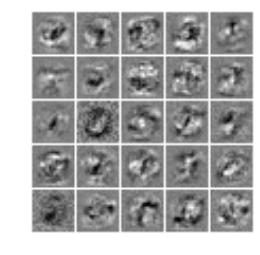

In [17]:
## ================= Part 9: Visualize Weights =================
"""
이제 neural network가 학습한것을 "visualize" 할 수 있는데 hidden units을
표시해서 데이터에서 캡쳐된 feature를 볼 수 있게 된다.
"""

def displayData(X, example_width = 0):
    """
    2D 데이터를 그리드 형식에 표시한다. 
    그림에 대한 핸들 h와 요청된 배열을 반환한다.
    """
    # example_width를 설정한다.
    if example_width == 0:
        example_width = round(np.sqrt(X.shape[1]))
    
    # rows, cols 수를 계산한다.
    
    m, n = X.shape
    example_height = (n / example_width)
    #m = 100, n = 400
    #print('m = %s, n = %s' % (m, n))
    
    example_width = int(example_width)
    example_height = int(example_height)
    #width = 20, height = 20
    #print('width = %s, height = %s' % (example_width, example_height))
    
    # 그려질 item의 갯수를 계산한다.
    display_rows = floor(np.sqrt(m))
    display_cols = ceil(m / display_rows)
    #rows = 10.0, cols = 10.0
    #print('rows = %s, cols = %s' % (display_rows, display_cols))  
    
    # 이미지 사이의 패딩을 설정한다.
    pad = 1
    
    # 비어있는 디스플레이를 설정한다. (211, 211)
    display_array = np.ones((pad + display_rows * (example_height + pad), 
                           pad + display_cols * (example_width + pad)))
    
    # 1 + 100 * (20 + 1)
    #print(display_array.shape)
    
    # 각각의 example을 display array상으로 복사한다.
    # ***************************************************************************
    # XXX: np.arange가 정수를 반환하도록 index 부분은 dtype=int를 주도록 한다.
    # ***************************************************************************
    curr_ex = 0
    for j in np.arange(display_rows, dtype=int):
        for i in np.arange(display_cols, dtype=int):
            if curr_ex >= m:
                break;
                
            # Copy the patch
            
            # Get the max value of the patch
            max_val = np.max(np.abs(X[curr_ex, :]))

            # python에서 인덱스는 0부터 시작한다. (j - 1) => j, (i - 1) => i
            #x = pad + j * (example_height + pad) + np.arange(example_height, dtype=int)
            #y = pad + i * (example_width + pad) + np.arange(example_width, dtype=int)

            x = pad + j * (example_height + pad)
            y = pad + i * (example_width + pad)
            
            #print('x = %s, y = %s' % (x, y))
            #print(display_array[x: x + example_height, y:y + example_width].shape)
            
            # 이미지를 올바르게 보이기 위해서 reshape 후에 transpose 시킨다.
            display_array[x:x + example_height, y: y + example_width] = \
                X[curr_ex, :].reshape((example_height, example_width)).T / max_val;

            curr_ex = curr_ex + 1
            
            if curr_ex >= m:
                break

    # ********************************************************
    # XXX: Ocatave의 imagesc() 는 imshow()로 대체가 가능하다.
    # ********************************************************
    # x, y축의 범위를 -1~1로 설정한다.
    #im = imshow(display_array, interpolation = 'bilinear', 
    #            origin = 'upper', 
    #            extent=(-1,1,-1,1))
    plt.set_cmap('gray')
    im = imshow(display_array)

    # 축을 보여주지 않는다.
    plt.axis('off')
    #show()
    
displayData(sel)


print('Visualizing Neural Network...')

displayData(Theta1[:, 1:])


In [19]:
## ================= Part 10: Implement Predict =================
"""
neural network를 학습한 이후에, labels을 예측하기 위해 그것을 사용할 수 있다.
당신은 이제 "predict" 함수를 구현해서 neural network를 사용하고 training set의
label을 예측해야 한다. 이것으로 training set의 accuracy 정확도를 계산할 수 있다.
"""

# exercise 3번의 predict() 와 같이 사용할 수 있다.
def predict(Theta1, Theta2, X):
    """
    neural network의 훈련된 가중치(Theta1, Theta2)에서 X의 예측된 label을 출력한다.
    """
    
    # 유용한 변수들
    m = X.shape[0]
    
    # 다음 변수값을 올바르게 반환해야 한다.
    p = np.zeros(m)
    
    # 입력값 X에서 첫번째 hidden layer에 대한 출력값을 구한다. (h1)
    # h1을 입력값으로 사용해서 최종 output layer에 대한 출력값을 구한다. (h2)
    # 여기서 가장 큰 값을 선택한다.
    a1 = np.hstack((np.ones((m, 1)), X))
    z = a1.dot(Theta1.T)
    h1 = sigmoid(z)
    #print(h1.shape) # 5000x25
    
    a2 = hstack((np.ones((m, 1)), h1))
    z = a2.dot(Theta2.T)
    h2 = sigmoid(z)
    
    print(h2.shape) # 5000x10
    p = np.argmax(h2, axis=1)
    p = p + 1
    
    return p

pred = predict(Theta1, Theta2, X)

# In Octave: Training Set Accuracy: 95.480000
print('Training Set Accuracy: ', mean(double(pred == y)) * 100)


(5000, 10)
Training Set Accuracy:  96.18


## The End